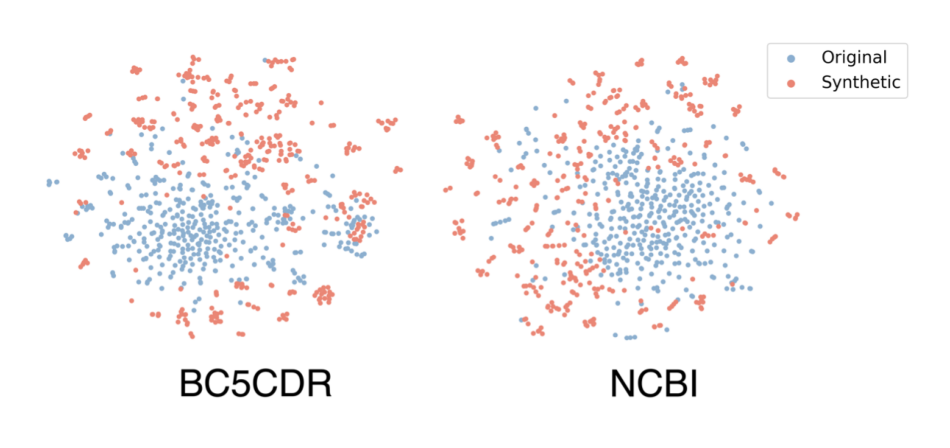

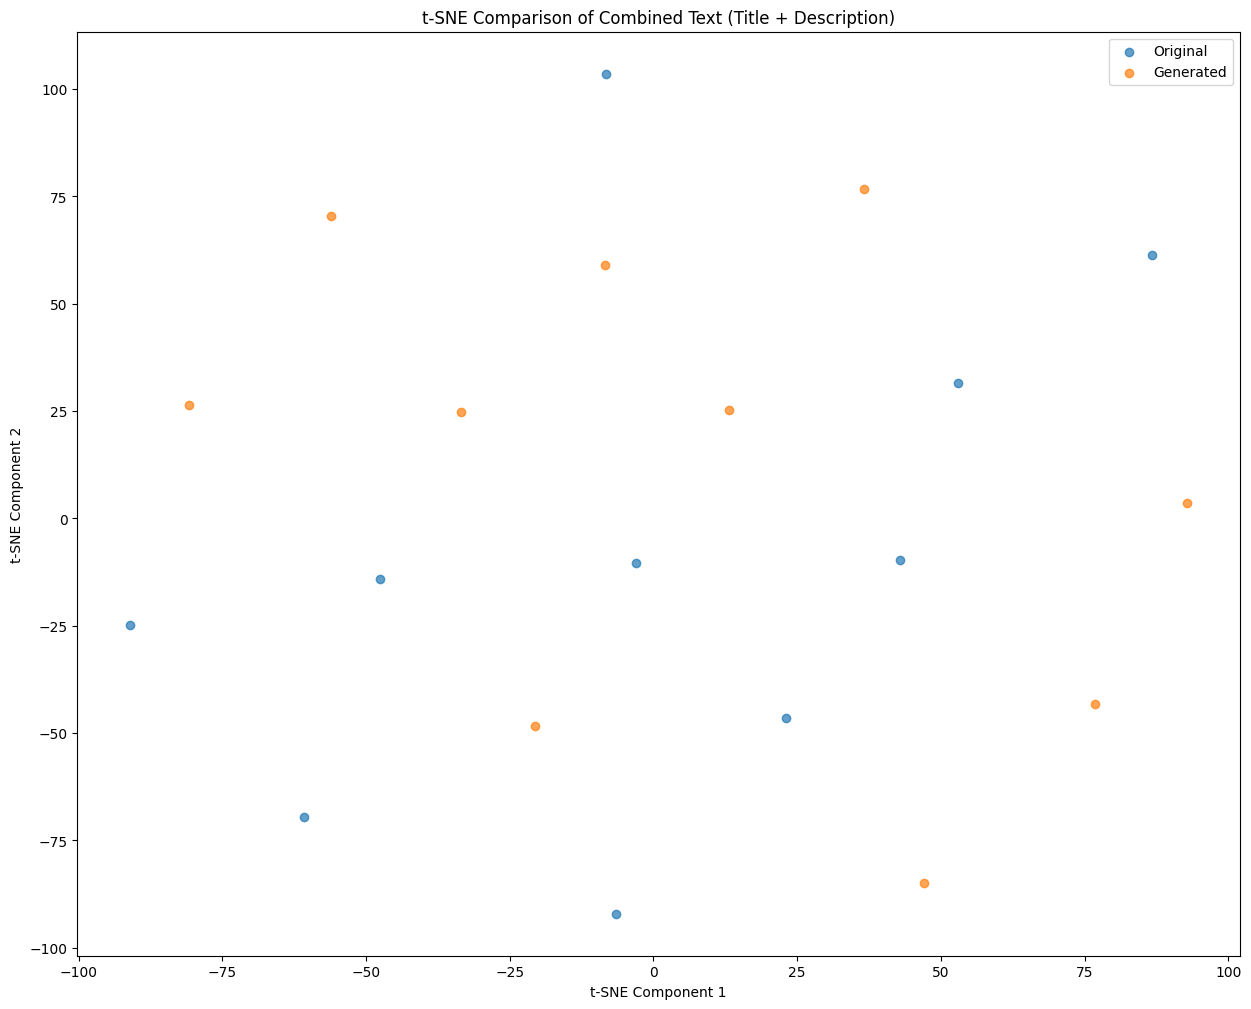

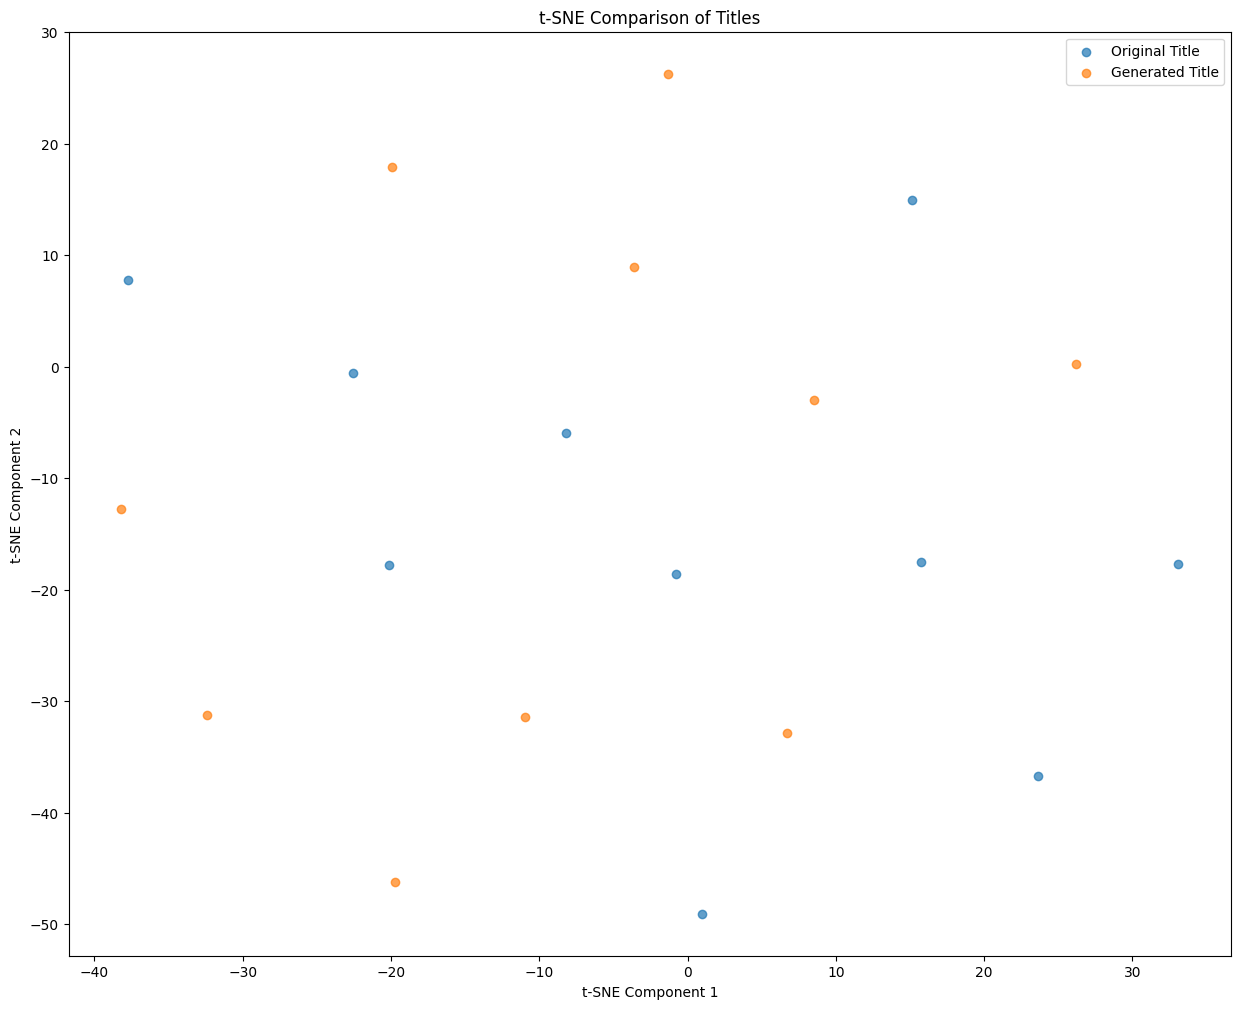

Original Title,Original Description,Generated Title,Generated Description,Semantic Similarity
WOMEN'S RUDOLPH JUMPSUIT,"Christmas in chaos? Dust off that red nose and pull on this Women's Reindeer jumpsuit. Santa is depending on you! Complete with super soft polar fleece fabric and a two-way zipper, it's much easier to handle than a sleigh. Plus, once you're done handing out all those presents, you can kick back and chill in this loose-fitting Christmas onesie.",Rudolph's Wild Ride Onesie,"Get ready to sleigh the holiday season with the Rudolph's Wild Ride Onesie! This officially licensed Rudolph the Red-Nosed Reindeer onesie is the ultimate quirky addition to your festive wardrobe. Crafted from ultra-soft, cozy fabric, this onesie features a hood with Rudolph's iconic antlers and a bright red nose that lights up the room (figuratively, of course). Whether you're dashing through the snow or just lounging by the fire, this onesie guarantees you'll be the life of the Christmas party. Perfect for holiday photos, gift exchanges, or just spreading some reindeer cheer, Rudolph's Wild Ride Onesie is your ticket to a holly jolly good time!",0.724
MEN'S CHRISTMAS TREE WITH BEER HOLSTERS UGLY CHRISTMAS SWEATER,"When you've got your hands full playing Santa, you need a Christmas sweater that works overtime for you. Enter, our Men's Christmas Tree sweater - this super lightweight sweater features four beer holsters so you're never out of fuel. The iconic ugly Christmas jumper design will light up holiday cards and make you the most popular guy in the room.","""Jingle Brews"" Christmas Tree Beer Holder Sweater","Get ready to jingle all the way with our ""Jingle Brews"" Christmas Tree Beer Holder Sweater! This quirky and outrageous sweater is designed to bring the ultimate holiday cheer to your festivities. Featuring a vibrant Christmas tree adorned with colorful pom-poms and snowflakes, this sweater takes holiday spirit to the next level with its built-in beer holders. Yes, you read that right! The bottom of the sweater boasts three festive gift-wrapped pockets, perfect for holding your favorite brews or soda cans. Whether you're at a holiday party, an ugly sweater contest, or just lounging at home, this sweater ensures you have your drinks handy and your hands free for all the fun. Celebrate the season in style and make unforgettable memories with this one-of-a-kind sweater!",0.730
MEN'S SWEET BABY JESUS UGLY CHRISTMAS SWEATER,"\nBring some humor and cheer to your holiday season with this Men's Sweet Baby Jesus Ugly Christmas Sweater. Whether you're having a holly jolly time or ready to call it a Silent Night, this festive sweater will have you feeling the Christmas spirit! (And looking super fly!)",Men's Baby Jesus Carrier Christmas Sweater,"Get ready to turn heads and spread some holiday cheer with our Men's Baby Jesus Carrier Christmas Sweater! This quirky and outrageous sweater features a hilarious design of Baby Jesus in a carrier, making it look like you're bringing the holy child along for the festive ride. Crafted from ultra-soft, high-quality fabric, this sweater ensures you stay cozy and comfortable while making a bold statement at any Christmas party. Whether you're attending an ugly sweater contest or just want to add some divine humor to your holiday wardrobe, this sweater is your go-to choice for unforgettable moments. Embrace the spirit of fun and celebration with a touch of holy humor!",0.806
MEN'S SANTA'S LOG ON THE FIRE UGLY CHRISTMAS SWEATER,"Feel like being a bad Santa this Christmas? There's nothing we love to see more than one of the nation's favorite old fat dudes doing something inappropriate, and what could be more inappropriate than this Men's Santa Pooping Down the Chimney Sweater? Ugly Christmas sweater has a whole new meaning when you rock up wearing something that literally takes a dump all over the Christmas season. He delivers to every boy and girl in one night, folks - when you gotta go, you gotta go. Comp

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#!pip install sentence_transformers

import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from IPython.display import Image, display, HTML



import matplotlib.image as mpimg


#image viewer
plt.figure(figsize=(12, 12))
plt.imshow(mpimg.imread('example.png'))
plt.axis('off')
plt.show()

# Load your product data results
data = pd.read_csv('products.csv')

# Combine 'title' and 'description' into a single string for both original and generated data
data['original_text'] = data['title'] + ' ' + data['description']
data['generated_text'] = data['generated title'] + ' ' + data['generated description']

# Create datasets for comparison
combined_data = pd.DataFrame({
    'text': pd.concat([data['original_text'], data['generated_text']]),
    'dataset_label': ['Original'] * len(data) + ['Generated'] * len(data)
})

titles_data = pd.DataFrame({
    'text': pd.concat([data['title'], data['generated title']]),
    'dataset_label': ['Original Title'] * len(data) + ['Generated Title'] * len(data)
})

# Function to apply t-SNE and plot results
def plot_tsne(data, title, zoom_out_factor):
    tfidf = TfidfVectorizer(max_features=1000)  # Adjust 'max_features' as needed
    X = tfidf.fit_transform(data['text'])

    n_samples = X.shape[0]
    perplexity = min(30, n_samples - 1)  # Set perplexity to a safe value, default is 30 rows

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X.toarray())

    y = data['dataset_label']

    plt.figure(figsize=(10 * zoom_out_factor, 8 * zoom_out_factor))
    for label in y.unique():
        plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label, alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()


plot_tsne(combined_data, 't-SNE Comparison of Combined Text (Title + Description)', 1.5)
plot_tsne(titles_data, 't-SNE Comparison of Titles', 1.5)


model = SentenceTransformer('all-MiniLM-L6-v2')

def compute_semantic_similarity(df):

    original_embeddings = model.encode(df['title'] + ' ' + df['description'], convert_to_tensor=True)
    generated_embeddings = model.encode(df['generated title'] + ' ' + df['generated description'], convert_to_tensor=True)

    # Compute cosine similarity between original and generated embeddings
    similarities = cosine_similarity(original_embeddings, generated_embeddings)

    # Store the results in the DataFrame
    df['semantic_similarity'] = np.diag(similarities)

    return df

def display_similarity(df):
    display_df = df[['title', 'description', 'generated title', 'generated description', 'semantic_similarity']].copy()

    display_df['semantic_similarity'] = display_df['semantic_similarity'].round(3)

    display_df.columns = ['Original Title', 'Original Description', 'Generated Title', 'Generated Description', 'Semantic Similarity']

    display(HTML(display_df.to_html(index=False, escape=False)))

# Load your dataset (Replace this path with your actual dataset path)
data = pd.read_csv('products.csv')

data_with_similarity = compute_semantic_similarity(data)

# Display the results in a readable format
display_similarity(data_with_similarity)